# Machine Learning

In many ways, machine learning is the primary means by which data science manifests itself to the broader world.
Machine learning is where these computational and algorithmic skills of data science meet the statistical thinking of data science, and the result is a collection of approaches to inference and data exploration that are not about effective theory so much as effective computation.

The term "machine learning" is sometimes thrown around as if it is some kind of magic pill: *apply machine learning to your data, and all your problems will be solved!*
As you might expect, the reality is rarely this simple.
While these methods can be incredibly powerful, to be effective they must be approached with a firm grasp of the strengths and weaknesses of each method, as well as a grasp of general concepts such as bias and variance, overfitting and underfitting, and more.

This chapter will dive into practical aspects of machine learning, primarily using Python's [Scikit-Learn](http://scikit-learn.org) package.
This is not meant to be a comprehensive introduction to the field of machine learning; that is a large subject and necessitates a more technical approach than we take here.
Nor is it meant to be a comprehensive manual for the use of the Scikit-Learn package (for this, you can refer to the resources listed in [Further Machine Learning Resources](05.15-Learning-More.ipynb)).
Rather, the goals of this chapter are:

- To introduce the fundamental vocabulary and concepts of machine learning.
- To introduce the Scikit-Learn API and show some examples of its use.
- To take a deeper dive into the details of several of the most important machine learning approaches, and develop an intuition into how they work and when and where they are applicable.

Much of this material is drawn from the Scikit-Learn tutorials and workshops I have given on several occasions at PyCon, SciPy, PyData, and other conferences.
Any clarity in the following pages is likely due to the many workshop participants and co-instructors who have given me valuable feedback on this material over the years!

Finally, if you are seeking a more comprehensive or technical treatment of any of these subjects, I've listed several resources and references in [Further Machine Learning Resources](05.15-Learning-More.ipynb).

# What Is Machine Learning?

Before we take a look at the details of various machine learning methods, let's start by looking at what machine learning is, and what it isn't.
Machine learning is often categorized as a subfield of artificial intelligence, but I find that categorization can often be misleading at first brush.
The study of machine learning certainly arose from research in this context, but in the data science application of machine learning methods, it's more helpful to think of machine learning as a means of *building models of data*.

Fundamentally, machine learning involves building mathematical models to help understand data.
"Learning" enters the fray when we give these models *tunable parameters* that can be adapted to observed data; in this way the program can be considered to be "learning" from the data.
Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.
I'll leave to the reader the more philosophical digression regarding the extent to which this type of mathematical, model-based "learning" is similar to the "learning" exhibited by the human brain.

Understanding the problem setting in machine learning is essential to using these tools effectively, and so we will start with some broad categorizations of the types of approaches we'll discuss here.

## Categories of Machine Learning

At the most fundamental level, machine learning can be categorized into two main types: supervised learning and unsupervised learning.

*Supervised learning* involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data.
This is further subdivided into *classification* tasks and *regression* tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities.
We will see examples of both types of supervised learning in the following section.

*Unsupervised learning* involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself."
These models include tasks such as *clustering* and *dimensionality reduction.*
Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data.
We will see examples of both types of unsupervised learning in the following section.

In addition, there are so-called *semi-supervised learning* methods, which falls somewhere between supervised learning and unsupervised learning.
Semi-supervised learning methods are often useful when only incomplete labels are available.

## Qualitative Examples of Machine Learning Applications

To make these ideas more concrete, let's take a look at a few very simple examples of a machine learning task.
These examples are meant to give an intuitive, non-quantitative overview of the types of machine learning tasks we will be looking at in this chapter.
In later sections, we will go into more depth regarding the particular models and how they are used.
For a preview of these more technical aspects, you can find the Python source that generates the following figures in the [Appendix: Figure Code](06.00-Figure-Code.ipynb).


### Classification: Predicting discrete labels

We will first take a look at a simple *classification* task, in which you are given a set of labeled points and want to use these to classify some unlabeled points.

Imagine that we have the data shown in this figure:

![](figures/05.01-classification-1.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Classification-Example-Figure-1)

Here we have two-dimensional data: that is, we have two *features* for each point, represented by the *(x,y)* positions of the points on the plane.
In addition, we have one of two *class labels* for each point, here represented by the colors of the points.
From these features and labels, we would like to create a model that will let us decide whether a new point should be labeled "blue" or "red."

There are a number of possible models for such a classification task, but here we will use an extremely simple one. We will make the assumption that the two groups can be separated by drawing a straight line through the plane between them, such that points on each side of the line fall in the same group.
Here the *model* is a quantitative version of the statement "a straight line separates the classes", while the *model parameters* are the particular numbers describing the location and orientation of that line for our data.
The optimal values for these model parameters are learned from the data (this is the "learning" in machine learning), which is often called *training the model*.

The following figure shows a visual representation of what the trained model looks like for this data:

![](figures/05.01-classification-2.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Classification-Example-Figure-2)

Now that this model has been trained, it can be generalized to new, unlabeled data.
In other words, we can take a new set of data, draw this model line through it, and assign labels to the new points based on this model.
This stage is usually called *prediction*. See the following figure:

![](figures/05.01-classification-3.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Classification-Example-Figure-3)

This is the basic idea of a classification task in machine learning, where "classification" indicates that the data has discrete class labels.
At first glance this may look fairly trivial: it would be relatively easy to simply look at this data and draw such a discriminatory line to accomplish this classification.
A benefit of the machine learning approach, however, is that it can generalize to much larger datasets in many more dimensions.

For example, this is similar to the task of automated spam detection for email; in this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ normalized counts of important words or phrases ("Viagra", "Nigerian prince", etc.)
- *label* $\to$ "spam" or "not spam"

For the training set, these labels might be determined by individual inspection of a small representative sample of emails; for the remaining emails, the label would be determined using the model.
For a suitably trained classification algorithm with enough well-constructed features (typically thousands or millions of words or phrases), this type of approach can be very effective.
We will see an example of such text-based classification in [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb).

Some important classification algorithms that we will discuss in more detail are Gaussian naive Bayes (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb)), support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), and random forest classification (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)).

### Regression: Predicting continuous labels

In contrast with the discrete labels of a classification algorithm, we will next look at a simple *regression* task in which the labels are continuous quantities.

Consider the data shown in the following figure, which consists of a set of points each with a continuous label:

![](figures/05.01-regression-1.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Regression-Example-Figure-1)

As with the classification example, we have two-dimensional data: that is, there are two features describing each data point.
The color of each point represents the continuous label for that point.

There are a number of possible regression models we might use for this type of data, but here we will use a simple linear regression to predict the points.
This simple linear regression model assumes that if we treat the label as a third spatial dimension, we can fit a plane to the data.
This is a higher-level generalization of the well-known problem of fitting a line to data with two coordinates.

We can visualize this setup as shown in the following figure:

![](figures/05.01-regression-2.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Regression-Example-Figure-2)

Notice that the *feature 1-feature 2* plane here is the same as in the two-dimensional plot from before; in this case, however, we have represented the labels by both color and three-dimensional axis position.
From this view, it seems reasonable that fitting a plane through this three-dimensional data would allow us to predict the expected label for any set of input parameters.
Returning to the two-dimensional projection, when we fit such a plane we get the result shown in the following figure:

![](figures/05.01-regression-3.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Regression-Example-Figure-3)

This plane of fit gives us what we need to predict labels for new points.
Visually, we find the results shown in the following figure:

![](figures/05.01-regression-4.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Regression-Example-Figure-4)

As with the classification example, this may seem rather trivial in a low number of dimensions.
But the power of these methods is that they can be straightforwardly applied and evaluated in the case of data with many, many features.

For example, this is similar to the task of computing the distance to galaxies observed through a telescope—in this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ brightness of each galaxy at one of several wave lengths or colors
- *label* $\to$ distance or redshift of the galaxy

The distances for a small number of these galaxies might be determined through an independent set of (typically more expensive) observations.
Distances to remaining galaxies could then be estimated using a suitable regression model, without the need to employ the more expensive observation across the entire set.
In astronomy circles, this is known as the "photometric redshift" problem.

Some important regression algorithms that we will discuss are linear regression (see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb)), support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), and random forest regression (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)).

### Clustering: Inferring labels on unlabeled data

The classification and regression illustrations we just looked at are examples of supervised learning algorithms, in which we are trying to build a model that will predict labels for new data.
Unsupervised learning involves models that describe data without reference to any known labels.

One common case of unsupervised learning is "clustering," in which data is automatically assigned to some number of discrete groups.
For example, we might have some two-dimensional data like that shown in the following figure:

![](figures/05.01-clustering-1.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Clustering-Example-Figure-2)

By eye, it is clear that each of these points is part of a distinct group.
Given this input, a clustering model will use the intrinsic structure of the data to determine which points are related.
Using the very fast and intuitive *k*-means algorithm (see [In Depth: K-Means Clustering](05.11-K-Means.ipynb)), we find the clusters shown in the following figure:

![](figures/05.01-clustering-2.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Clustering-Example-Figure-2)

*k*-means fits a model consisting of *k* cluster centers; the optimal centers are assumed to be those that minimize the distance of each point from its assigned center.
Again, this might seem like a trivial exercise in two dimensions, but as our data becomes larger and more complex, such clustering algorithms can be employed to extract useful information from the dataset.

We will discuss the *k*-means algorithm in more depth in [In Depth: K-Means Clustering](05.11-K-Means.ipynb).
Other important clustering algorithms include Gaussian mixture models (See [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb)) and spectral clustering (See [Scikit-Learn's clustering documentation](http://scikit-learn.org/stable/modules/clustering.html)).

### Dimensionality reduction: Inferring structure of unlabeled data

Dimensionality reduction is another example of an unsupervised algorithm, in which labels or other information are inferred from the structure of the dataset itself.
Dimensionality reduction is a bit more abstract than the examples we looked at before, but generally it seeks to pull out some low-dimensional representation of data that in some way preserves relevant qualities of the full dataset.
Different dimensionality reduction routines measure these relevant qualities in different ways, as we will see in [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb).

As an example of this, consider the data shown in the following figure:

![](figures/05.01-dimesionality-1.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Dimensionality-Reduction-Example-Figure-1)

Visually, it is clear that there is some structure in this data: it is drawn from a one-dimensional line that is arranged in a spiral within this two-dimensional space.
In a sense, you could say that this data is "intrinsically" only one dimensional, though this one-dimensional data is embedded in higher-dimensional space.
A suitable dimensionality reduction model in this case would be sensitive to this nonlinear embedded structure, and be able to pull out this lower-dimensionality representation.

The following figure shows a visualization of the results of the Isomap algorithm, a manifold learning algorithm that does exactly this:

![](figures/05.01-dimesionality-2.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Dimensionality-Reduction-Example-Figure-2)

Notice that the colors (which represent the extracted one-dimensional latent variable) change uniformly along the spiral, which indicates that the algorithm did in fact detect the structure we saw by eye.
As with the previous examples, the power of dimensionality reduction algorithms becomes clearer in higher-dimensional cases.
For example, we might wish to visualize important relationships within a dataset that has 100 or 1,000 features.
Visualizing 1,000-dimensional data is a challenge, and one way we can make this more manageable is to use a dimensionality reduction technique to reduce the data to two or three dimensions.

Some important dimensionality reduction algorithms that we will discuss are principal component analysis (see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)) and various manifold learning algorithms, including Isomap and locally linear embedding (See [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)).

## Summary

Here we have seen a few simple examples of some of the basic types of machine learning approaches.
Needless to say, there are a number of important practical details that we have glossed over, but I hope this section was enough to give you a basic idea of what types of problems machine learning approaches can solve.

In short, we saw the following:

- *Supervised learning*: Models that can predict labels based on labeled training data

  - *Classification*: Models that predict labels as two or more discrete categories
  - *Regression*: Models that predict continuous labels
  
- *Unsupervised learning*: Models that identify structure in unlabeled data

  - *Clustering*: Models that detect and identify distinct groups in the data
  - *Dimensionality reduction*: Models that detect and identify lower-dimensional structure in higher-dimensional data
  
In the following sections we will go into much greater depth within these categories, and see some more interesting examples of where these concepts can be useful.

All of the figures in the preceding discussion are generated based on actual machine learning computations; the code behind them can be found in [Appendix: Figure Code](06.00-Figure-Code.ipynb).

# Introducing Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

This section provides an overview of the Scikit-Learn API; a solid understanding of these API elements will form the foundation for understanding the deeper practical discussion of machine learning algorithms and approaches in the following chapters.

We will start by covering *data representation* in Scikit-Learn, followed by covering the *Estimator* API, and finally go through a more interesting example of using these tools for exploring a set of images of hand-written digits.

## Data Representation in Scikit-Learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.
The best way to think about data within Scikit-Learn is in terms of tables of data.

### Data as table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as ``n_samples``.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.

#### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array

In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable.
For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.

With this target array in mind, we can use Seaborn (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data:

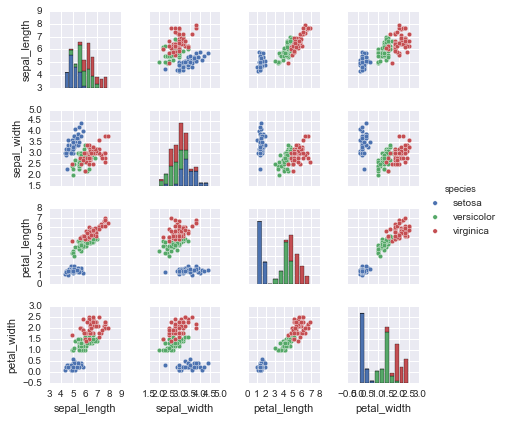

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations discussed in the [Chapter 3](03.00-Introduction-to-Pandas.ipynb):

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

To summarize, the expected layout of features and target values is visualized in the following diagram:

![](figures/05.02-samples-features.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

With this data properly formatted, we can move on to consider the *estimator* API of Scikit-Learn:

## Scikit-Learn's Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: Only algorithms are represented by Python classes; datasets are represented
  in standard formats (NumPy arrays, Pandas ``DataFrame``s, SciPy sparse matrices) and parameter
  names use standard Python strings.

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

### Supervised learning example: Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following simple data for our regression example:

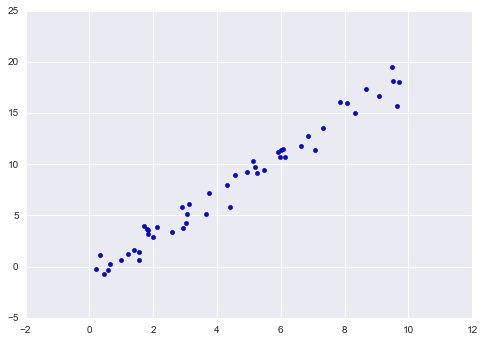

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

With this data in place, we can use the recipe outlined earlier. Let's walk through the process: 

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [6]:
from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well; you can read more about them in the [``sklearn.linear_model`` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

An important point is that *a class of model is not the same as an instance of a model*.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.
We will explore how you can quantitatively motivate the choice of hyperparameters in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb).

For our linear regression example, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable ``y`` is already in the correct form (a length-``n_samples`` array), but we need to massage the data ``x`` to make it a matrix of size ``[n_samples, n_features]``.
In this case, this amounts to a simple reshaping of the one-dimensional array:

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to your data

Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

In [9]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

In [10]:
model.coef_

array([ 1.9776566])

In [11]:
model.intercept_

-0.90331072553111635

These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

One question that frequently comes up regards the uncertainty in such internal model parameters.
In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
Machine learning rather focuses on what the model *predicts*.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [Statsmodels Python package](http://statsmodels.sourceforge.net/).

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [12]:
xfit = np.linspace(-1, 11)

As before, we need to coerce these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

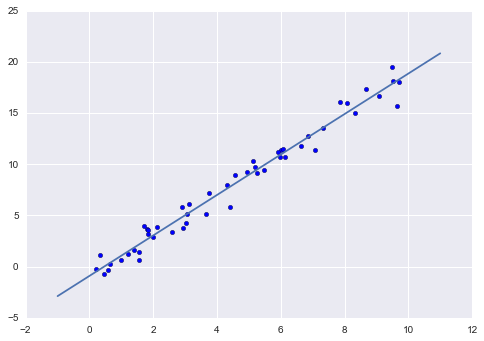

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

### Supervised learning example: Iris classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) for more details).
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the ``train_test_split`` utility function:

In [15]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [16]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

In [18]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

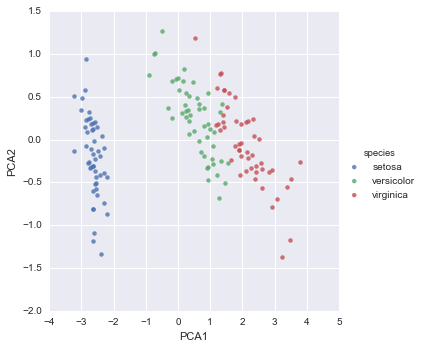

In [19]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

### Unsupervised learning: Iris clustering

Let's next look at applying clustering to the Iris data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a powerful clustering method called a Gaussian mixture model (GMM), discussed in more detail in [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb).
A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [20]:
from sklearn.mixture import GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

As before, we will add the cluster label to the Iris ``DataFrame`` and use Seaborn to plot the results:

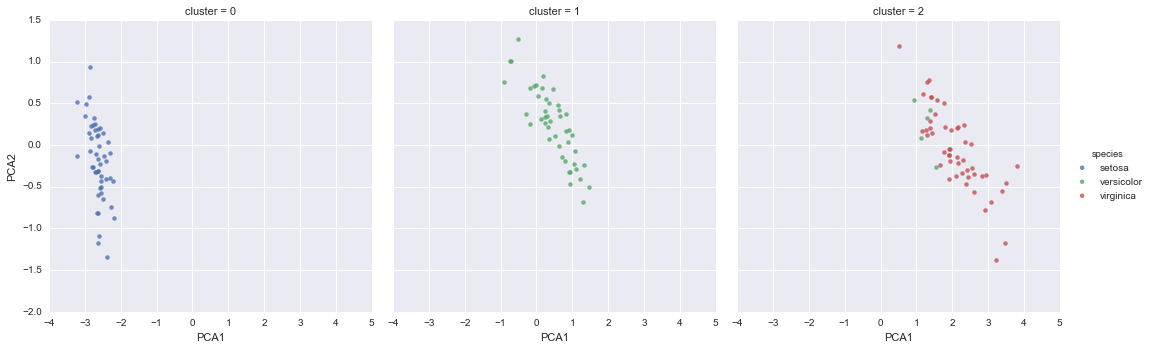

In [21]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the *setosa* species is separated perfectly within cluster 0, while there remains a small amount of mixing between *versicolor* and *virginica*.
This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!
This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.